## Long Short-Term Memory (LSTM) 
1. What is LSTM?

- Long Short-Term Memory (LSTM) is a special type of Recurrent Neural Network (RNN) designed to learn long-term dependencies in sequential data.

- LSTM overcomes the vanishing gradient problem found in traditional RNNs by introducing a memory cell and gating mechanisms.

2. Why LSTM Was Introduced?

- Basic RNNs struggle to remember information for long sequences because gradients either:

- Become too small (vanishing gradient), or

- Become too large (exploding gradient)

**LSTM solves this by:**

- Controlling information flow using gates

- Maintaining a separate cell state that acts as long-term memory

## 3. Key Idea Behind LSTM

**LSTM decides:**

- What information to forget

- What new information to store

- What information to output

This decision-making is handled by gates.

## 4. LSTM Architecture Overview

**Each LSTM cell contains:**

- Cell State

- Hidden State

- Three gates:

- Forget Gate

- Input Gate

- Output Gate

The cell state flows through the network with minimal changes, enabling long-term memory.

## 5. LSTM Gates Explained
### 5.1 Forget Gate

**Decides what information to remove from the cell state.**

**Formula:**

f(t) = σ(Wf · [h(t-1), x(t)] + bf)


- Output value ranges between 0 and 1

- 0 means forget completely

- 1 means keep fully

### 5.2 Input Gate

- Decides what new information should be added.

**Two steps:**

- Sigmoid layer decides which values to update

- Tanh layer creates candidate values

**Formulas:**

- i(t) = σ(Wi · [h(t-1), x(t)] + bi)
- c~(t) = tanh(Wc · [h(t-1), x(t)] + bc)

### 5.3 Cell State Update

**Updates the cell memory.**

**Formula:**

- C(t) = f(t) * C(t-1) + i(t) * c~(t)

### 5.4 Output Gate

**Decides what to output from the cell.**

**Formula:**

- o(t) = σ(Wo · [h(t-1), x(t)] + bo)
- h(t) = o(t) * tanh(C(t))

## 6. LSTM Working Flow (Step-by-Step)

- Input enters LSTM cell

- Forget gate removes unnecessary memory

- Input gate adds relevant information

- Cell state is updated

- Output gate produces hidden state

## 7. Why LSTM Works Better Than RNN

| Feature            | RNN    | LSTM   |
| ------------------ | ------ | ------ |
| Long-term memory   | Poor   | Strong |
| Vanishing gradient | Common | Rare   |
| Gating mechanism   | No     | Yes    |
| Stability          | Low    | High   |


# 1. Project Overview

## Project Title:
#### Sentiment Analysis using LSTM

## Objective:
#### Classify a sentence as Positive or Negative using an LSTM model.

### Problem Statement

- Given a sentence or review, predict whether the sentiment expressed is positive or negative.

## Step 1: Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Step 2: Load Dataset

In [4]:
vocab_size = 10000  # consider top 10,000 words

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)

print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training samples: 25000
Testing samples: 25000


## Step 3: Pad Sequences

In [5]:
max_length = 200

X_train = pad_sequences(X_train, maxlen=max_length)
X_test = pad_sequences(X_test, maxlen=max_length)

print("Input shape:", X_train.shape)

Input shape: (25000, 200)


## Step 4: Build LSTM Model

In [6]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

C:\Users\range\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Step 5: Train the Model

In [7]:
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 47s 141ms/step - accuracy: 0.7670 - loss: 0.4660 - val_accuracy: 0.8578 - val_loss: 0.3412
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 135ms/step - accuracy: 0.8936 - loss: 0.2686 - val_accuracy: 0.8622 - val_loss: 0.3162
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 123ms/step - accuracy: 0.9284 - loss: 0.1897 - val_accuracy: 0.8642 - val_loss: 0.3682


## Step 6: Evaluate the Model

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.8537 - loss: 0.3902
Test Accuracy: 0.8536800146102905


## Step 7: Plot Training Accuracy

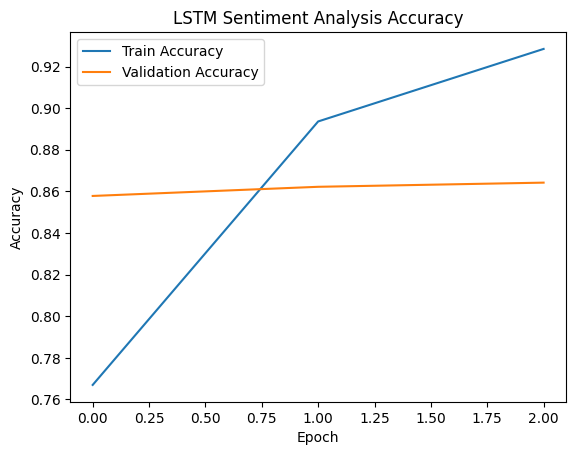

In [10]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Sentiment Analysis Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Output Interpretation
- Accuracy improves with epochs

- LSTM understands word order and context

- Model performs better than simple bag-of-words methods

## Key Concepts Applied
| Concept               | Used |
| --------------------- | ---- |
| Sequential text data  | Yes  |
| Word embeddings       | Yes  |
| Long-term dependency  | Yes  |
| LSTM memory           | Yes  |
| Binary classification | Yes  |


#### Implemented a sentiment analysis system using LSTM networks in TensorFlow to classify movie reviews as positive or negative, leveraging word embeddings and sequence learning.

## How to Predict a Value Using the LSTM Model

In [11]:
from tensorflow.keras.datasets import imdb

word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [17]:
def encode_review(text):
    words = text.lower().split()
    encoded = []
    
    for word in words:
        if word in word_index and word_index[word] < vocab_size:
            encoded.append(word_index[word])
        else:
            encoded.append(0)
            
    return encoded


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_length = 200

def preprocess_text(text):
    encoded = encode_review(text)
    padded = pad_sequences([encoded], maxlen=max_length)
    return padded


In [19]:
def predict_sentiment(text):
    processed_text = preprocess_text(text)
    prediction = model.predict(processed_text)
    
    return prediction[0][0]


In [26]:
sentence = "I did not like this movie at all"

score = predict_sentiment(sentence)

if score >= 0.5:
    print("Sentiment: NEGATIVE")
else:
    print("Sentiment: POSITIVE")

print("Confidence Score:", score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Sentiment: NEGATIVE
Confidence Score: 0.5235286


In [28]:
sentence = "It really enjoyed this movie"

score = predict_sentiment(sentence)

if score >= 0.5:
    print("Sentiment: NEGATIVE")
else:
    print("Sentiment: POSITIVE")

print("Confidence Score:", score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Sentiment: POSITIVE
Confidence Score: 0.45533213


In [29]:
sentence = "Some parts were good but others were boring"

score = predict_sentiment(sentence)

if score >= 0.5:
    print("Sentiment: NEGATIVE")
else:
    print("Sentiment: POSITIVE")

print("Confidence Score:", score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Sentiment: NEGATIVE
Confidence Score: 0.7751836


In [30]:
sentence = "The story was average"

score = predict_sentiment(sentence)

if score >= 0.5:
    print("Sentiment: NEGATIVE")
else:
    print("Sentiment: POSITIVE")

print("Confidence Score:", score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Sentiment: NEGATIVE
Confidence Score: 0.6505757


In [31]:
sentence = "It was not bad, but not amazing either"

score = predict_sentiment(sentence)

if score >= 0.5:
    print("Sentiment: NEGATIVE")
else:
    print("Sentiment: POSITIVE")

print("Confidence Score:", score)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Sentiment: POSITIVE
Confidence Score: 0.12645513


## Example Outputs

| Sentence                   | Model Output | Result   |
| -------------------------- | ------------ | -------- |
| "This movie was fantastic" | 0.91         | Positive |
| "I hated this movie"       | 0.12         | Negative |
| "The movie was okay"       | 0.53         | Positive |


# The End !!